In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import os

In [2]:
file = pd.read_csv('namedf.csv')

### Checking the total unique names in the data shows there are 97310 names

In [3]:
namedf = pd.DataFrame(file)

In [4]:
len(namedf.name.unique())

97310

### To speed up the site i'm going to find the top 500 Female and top 500 male names then save the graph for them. They can later be looked up in a hash table. Other less common names will still need to be graphed.

In [5]:
maledf = namedf[namedf['gender']=='M']
femaledf = namedf[namedf['gender']=='F']

In [6]:
maledf.groupby(['name']).sum().sort_values('count',ascending=False)[:500]['count']
males = pd.DataFrame(maledf.groupby(['name']).sum().sort_values('count',ascending=False)[:500]['count'])
males.reset_index(level=0, inplace=True)
males

,name,count
0,James,5150472
1,John,5115466
2,Robert,4814815
3,Michael,4350824
4,William,4102604
5,David,3611329
6,Joseph,2603445
7,Richard,2563082
8,Charles,2386048
9,Thomas,2304948


In [7]:
femaledf.groupby(['name']).sum().sort_values('count',ascending=False)[:500]['count']
females = pd.DataFrame(femaledf.groupby(['name']).sum().sort_values('count',ascending=False)[:500]['count'])
females.reset_index(level=0, inplace=True)
females

,name,count
0,Mary,4123200
1,Elizabeth,1629679
2,Patricia,1571692
3,Jennifer,1466281
4,Linda,1452249
5,Barbara,1434060
6,Margaret,1246649
7,Susan,1121440
8,Dorothy,1107096
9,Sarah,1073895


In [8]:
def graphs(topnames, gender):
    names = pd.read_csv("namedf.csv")[['name','gender','count','year']]
    for name in topnames:
        name = name.title()
        plt.clf()
        plt.plot(names[(names['name']==f'{name}') & (names['gender']==f'{gender}')]['year'].astype(str),
                            names[(names['name']==f'{name}') & (names['gender']==f'{gender}')]['count'].astype(int),
                            c='b',
                            marker='o',
                            label=f'{name} : M')
        plt.xticks(rotation=90)
        plt.grid()
        plt.title(f"Popularity of Name for {str(name).title()} (US)")
        plt.ylabel("Name Count")
        plt.legend()
        plt.savefig(f"../static/img/pregraphed/{gender}/{name}.png")

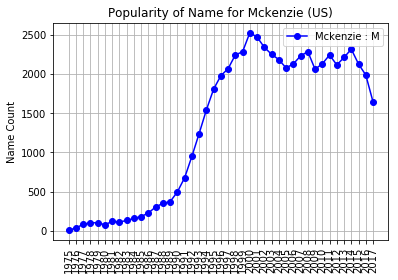

In [9]:
graphs(males.name, 'M')
graphs(females.name,'F')

In [12]:
pregraphedMales = {}
for filename in os.listdir("../static/img/pregraphed/M"):
    pregraphedMales[f"{filename.split('.')[0]}"] = filename
pregraphedFemales = {}
for filename in os.listdir("../static/img/pregraphed/F"):
    pregraphedFemales[f"{filename.split('.')[0]}"] = filename

In [13]:
pregraphedMales

{'Aaron': 'Aaron.png',
 'Abel': 'Abel.png',
 'Abraham': 'Abraham.png',
 'Adam': 'Adam.png',
 'Adrian': 'Adrian.png',
 'Aidan': 'Aidan.png',
 'Aiden': 'Aiden.png',
 'Alan': 'Alan.png',
 'Albert': 'Albert.png',
 'Alberto': 'Alberto.png',
 'Alec': 'Alec.png',
 'Alejandro': 'Alejandro.png',
 'Alex': 'Alex.png',
 'Alexander': 'Alexander.png',
 'Alexis': 'Alexis.png',
 'Alfred': 'Alfred.png',
 'Alfredo': 'Alfredo.png',
 'Allan': 'Allan.png',
 'Allen': 'Allen.png',
 'Alton': 'Alton.png',
 'Alvin': 'Alvin.png',
 'Andre': 'Andre.png',
 'Andres': 'Andres.png',
 'Andrew': 'Andrew.png',
 'Andy': 'Andy.png',
 'Angel': 'Angel.png',
 'Angelo': 'Angelo.png',
 'Anthony': 'Anthony.png',
 'Antonio': 'Antonio.png',
 'Archie': 'Archie.png',
 'Armando': 'Armando.png',
 'Arnold': 'Arnold.png',
 'Arthur': 'Arthur.png',
 'Arturo': 'Arturo.png',
 'Asher': 'Asher.png',
 'Ashton': 'Ashton.png',
 'August': 'August.png',
 'Austin': 'Austin.png',
 'Avery': 'Avery.png',
 'Ayden': 'Ayden.png',
 'Barry': 'Barry.png',
 

In [14]:
pregraphedFemales

{'Aaliyah': 'Aaliyah.png',
 'Abby': 'Abby.png',
 'Abigail': 'Abigail.png',
 'Ada': 'Ada.png',
 'Addison': 'Addison.png',
 'Adriana': 'Adriana.png',
 'Adrienne': 'Adrienne.png',
 'Agnes': 'Agnes.png',
 'Alberta': 'Alberta.png',
 'Alexa': 'Alexa.png',
 'Alexandra': 'Alexandra.png',
 'Alexandria': 'Alexandria.png',
 'Alexis': 'Alexis.png',
 'Alice': 'Alice.png',
 'Alicia': 'Alicia.png',
 'Alison': 'Alison.png',
 'Allison': 'Allison.png',
 'Alma': 'Alma.png',
 'Alyssa': 'Alyssa.png',
 'Amanda': 'Amanda.png',
 'Amber': 'Amber.png',
 'Amelia': 'Amelia.png',
 'Amy': 'Amy.png',
 'Ana': 'Ana.png',
 'Andrea': 'Andrea.png',
 'Angel': 'Angel.png',
 'Angela': 'Angela.png',
 'Angelica': 'Angelica.png',
 'Angelina': 'Angelina.png',
 'Angie': 'Angie.png',
 'Anita': 'Anita.png',
 'Ann': 'Ann.png',
 'Anna': 'Anna.png',
 'Annabelle': 'Annabelle.png',
 'Anne': 'Anne.png',
 'Annette': 'Annette.png',
 'Annie': 'Annie.png',
 'Antoinette': 'Antoinette.png',
 'April': 'April.png',
 'Ariana': 'Ariana.png',
 'Ar

### The dictionary of names made for namesDictionary.py